In [34]:
import pandas as pd

In [35]:
A = pd.read_csv("spam.csv")

In [36]:
A

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [37]:
A["Category"].value_counts()

ham     4825
spam     747
Name: Category, dtype: int64

In [38]:
import matplotlib.pyplot as plt

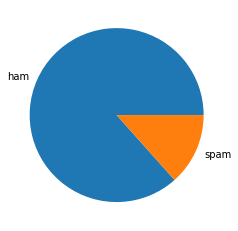

In [39]:
plt.pie(A["Category"].value_counts(),labels=['ham','spam'])
plt.show()

In [40]:
def prep_txt(w):
    import re
    q = re.sub("[^a-zA-Z0-9 ]","",w)
    q = q.lower()
    q = q.split(" ")
#     removing StopWords
    from nltk.corpus import stopwords
    sw = stopwords.words("english")
    from nltk.stem import PorterStemmer,WordNetLemmatizer
    ps = PorterStemmer()
    wnl = WordNetLemmatizer()
    r = ""
    for i in q:
        if(i not in sw):
            t = wnl.lemmatize(i)
            t = ps.stem(t)
            r = r + " " + t
    return r
Q = []
for i in A.Message:
    Q.append(prep_txt(i))

In [41]:
Q

[' go jurong point crazi avail bugi n great world la e buffet cine got amor wat',
 ' ok lar joke wif u oni',
 ' free entri 2 wkli comp win fa cup final tkt 21st may 2005 text fa 87121 receiv entri questionstd txt ratetc appli 08452810075over18',
 ' u dun say earli hor u c alreadi say',
 ' nah dont think go usf life around though',
 ' freemsg hey darl 3 week word back id like fun still tb ok xxx std chg send 150 rcv',
 ' even brother like speak treat like aid patent',
 ' per request mell mell oru minnaminungint nurungu vettam set callertun caller press 9 copi friend callertun',
 ' winner valu network custom select receivea 900 prize reward claim call 09061701461 claim code kl341 valid 12 hour',
 ' mobil 11 month u r entitl updat latest colour mobil camera free call mobil updat co free 08002986030',
 ' im gonna home soon dont want talk stuff anymor tonight k ive cri enough today',
 ' six chanc win cash 100 20000 pound txt csh11 send 87575 cost 150pday 6day 16 tsandc appli repli hl 4 info

# Vectorization

In [93]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfid = TfidfVectorizer(max_features=2500)
X = tfid.fit_transform(Q).toarray()

In [94]:
X.shape

(5572, 2500)

In [95]:
A.Category

0        ham
1        ham
2       spam
3        ham
4        ham
        ... 
5567    spam
5568     ham
5569     ham
5570     ham
5571     ham
Name: Category, Length: 5572, dtype: object

In [96]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Y = le.fit_transform(A.Category)

In [97]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [98]:
Y

array([0, 0, 1, ..., 0, 0, 0])

In [99]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size=0.2,random_state=5)

In [100]:
from sklearn.naive_bayes import GaussianNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix
gnb = GaussianNB()
bnb = BernoulliNB()
model = gnb.fit(xtrain,ytrain)
model1 = bnb.fit(xtrain,ytrain)

In [101]:
pred = model.predict(xtest)
print("----------for GaussianNB---------- ")
print(accuracy_score(ytest,pred))
print(confusion_matrix(ytest,pred))

----------for GaussianNB---------- 
0.8654708520179372
[[828 142]
 [  8 137]]


In [102]:
pred1 = model1.predict(xtest)
print("----------for BernoulliNB---------- ")
print(accuracy_score(ytest,pred1))
print(confusion_matrix(ytest,pred1))

----------for BernoulliNB---------- 
0.9838565022421525
[[969   1]
 [ 17 128]]


# Using NN

In [52]:
from keras.models import Sequential
from keras.layers import Dense,Dropout

In [53]:
nn = Sequential()

In [54]:
nn.add(Dense(100,input_dim = xtrain.shape[1]))
nn.add(Dense(100,activation="relu"))
nn.add(Dense(100,activation="relu"))
nn.add(Dropout(0.2))
nn.add(Dense(100,activation="relu"))
nn.add(Dropout(0.2))
nn.add(Dense(100,activation="relu"))
nn.add(Dropout(0.2))
nn.add(Dense(1,activation="sigmoid"))

In [55]:
nn.compile(loss="binary_crossentropy",metrics=["accuracy"])
model_new = nn.fit(xtrain,ytrain,epochs=5,validation_batch_size=34)

Epoch 1/5
140/140 [==============================] - 10s 35ms/step - loss: 0.1517 - accuracy: 0.9506
Epoch 2/5
140/140 [==============================] - 5s 34ms/step - loss: 0.0451 - accuracy: 0.9892
Epoch 3/5
140/140 [==============================] - 5s 36ms/step - loss: 0.0287 - accuracy: 0.9937
Epoch 4/5
140/140 [==============================] - 5s 34ms/step - loss: 0.0168 - accuracy: 0.9960
Epoch 5/5
140/140 [==============================] - 4s 32ms/step - loss: 0.0080 - accuracy: 0.9984


In [56]:
predx = nn.predict(xtest)
import tensorflow as tf
print(tf.math.confusion_matrix(predx,ytest))

35/35 [==============================] - 0s 8ms/step
tf.Tensor(
[[970  62]
 [  0  83]], shape=(2, 2), dtype=int32)


# Ouptput

In [107]:
val = input("Enter Mail")
v1 = prep_txt(val)
inp = tfid.transform([v1]).toarray()
op = model1.predict(inp)[0]
if(op==1):
    print("Spam")
else:
    print("Not Spam")

Enter MailUh oh. It looks like you had no writing activity with Grammarly last week. Please check to see that you're still logged in so we can send you your latest stats and awesome achievements!
Not Spam


In [108]:
import pickle

In [109]:
pickle.dump(model1,open("model.pkl",'wb'))
pickle.dump(tfid,open("vector.pkl",'wb'))